In [1]:
from sklearn.model_selection import KFold,StratifiedKFold

In [2]:
data =[3,6,1,2,3,8,9,0,3,4,6,7,6,7,8,3]

In [3]:
KFold =KFold(n_splits=5)
for train,test in KFold.split(data):
    print(train,test)


[ 4  5  6  7  8  9 10 11 12 13 14 15] [0 1 2 3]
[ 0  1  2  3  7  8  9 10 11 12 13 14 15] [4 5 6]
[ 0  1  2  3  4  5  6 10 11 12 13 14 15] [7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 13 14 15] [10 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12] [13 14 15]


## KFold cross validation on dataset

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
digits =load_digits()

In [28]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [29]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

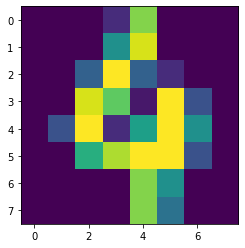

In [30]:
plt.imshow(digits.images[100]) #inshow is image show

In [31]:
# digits.target(0)

In [32]:
x =digits.data
y=digits.target

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [34]:
rf=RandomForestClassifier(random_state=12)
rf.fit(x_train,y_train)
rf_score =rf.score(x_test,y_test)

dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_score =dt.score(x_test,y_test)

kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_score=kn.score(x_test,y_test)

### models with KFold

In [35]:
kfold_rf_score = cross_val_score(RandomForestClassifier(random_state=12),
                                X=digits.data,y=digits.target,cv=3)
kfold_dt_score = cross_val_score(DecisionTreeClassifier(),
                                X=digits.data,y=digits.target,cv=3)
kfold_kn_score = cross_val_score(KNeighborsClassifier(n_neighbors=12),
                                X=digits.data,y=digits.target,cv=3)

In [36]:
kfold_rf_score = kfold_rf_score.mean()
kfold_dt_score = kfold_dt_score.mean()
kfold_kn_score = kfold_kn_score.mean()

In [37]:
pd.DataFrame({'Model':['Random forest','Decision Tree','KNeighbors'],
             'Scores without Kfold':[rf_score,dt_score,kn_score],
             "Scores with kfold":[kfold_rf_score,kfold_dt_score,kfold_kn_score]})

,Model,Scores without Kfold,Scores with kfold
0,Random forest,0.975000,0.944352
1,Decision Tree,0.816667,0.788536
2,KNeighbors,0.980556,0.953812
